In [2]:
import seaborn as sns;
titanic=sns.load_dataset("titanic");
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


# Q.0.a> Creating class and filter (to find if any column have more missing data than minimum requirements) and fill the missing data. And drop the filtered column.

In [1]:
import math
import pandas as pd;
from sklearn.impute import SimpleImputer;
import numpy as np;
class Table:
    def __init__(this,t=pd.DataFrame()):
        this.titan=t
        
    def filtert(this,PercentNA=float()):
        t=this.titan.columns
        PercentNA=PercentNA/100
        for i in t:
            if (this.titan[i].isnull().sum()>math.floor(PercentNA*(len(this.titan)))):
                this.titan=this.titan.drop([i],1);
        return(this.titan)
    
    def findMissingByMode(this,nColumn=list()):
        Imputer=SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
        for i in nColumn:
            i=this.titan.columns[i]
            if this.titan[i].isnull().sum()>0:
                this.titan[i]=Imputer.fit_transform(np.array(this.titan[i]).reshape(-1,1))
        return(this.titan)
    
    def countParameter(this,column=list(),content=list()):
        return(this.titan[this.titan[column]==content][column].count())
    def info(this):
        return(this.titan.info())
    
    
    
import seaborn as sns;
titanic=sns.load_dataset("titanic");        

g=Table(titanic)
PercentNA=float(input("Maximum Possible Percentage Data NaN:"))
g.filtert(PercentNA)
a=g.findMissingByMode([7,11])
b=g.countParameter(["embarked","age"],["Q",20])

avg_age_man=float(format(g.titan["age"].where(g.titan["who"]=="man").dropna().mean(),'.2f'))
avg_age_woman=float(format(g.titan["age"].where(g.titan["who"]=="woman").dropna().mean(),'.2f'))
avg_age_child_M=float(format(g.titan["age"].where(g.titan["who"].where(g.titan["sex"]=="male")=="child").dropna().median(),'.2f'))
avg_age_child_W=float(format(g.titan["age"].where(g.titan["who"].where(g.titan["sex"]=="female")=="child").dropna().mean(),'.2f'))

for i in range(0,1,len(g.titan)):
    if math.isnan(g.titan["age"][i]):
        if g.titan["who"][i]=="man":
            g.titan["age"][i]=avg_age_man
        elif g.titan["who"][i]=="woman":
            g.titan["age"][i]=avg_age_woman
        elif g.titan["who"][i]=="child" and g.titan["sex"][i]=="male":
            g.titan["age"][i]=avg_age_child_M
        elif g.titan["who"][i]=="child" and g.titan["sex"][i]=="female":
            g.titan["age"][i]=avg_age_child_W
            
g.info()

Maximum Possible Percentage Data NaN:70
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


# Q.1.a.> Draw the graph for number of people in particular class

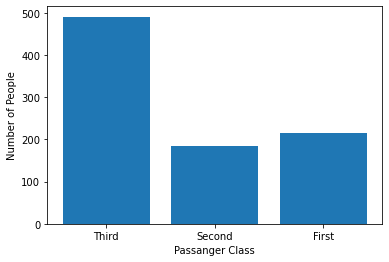

In [5]:
from matplotlib import pyplot as plt;
x=["Third","Second","First"]
a=[];pclass=[3,2,1]
for i in pclass:
    a.append(g.titan["pclass"].where(g.titan["pclass"]==i).dropna().count())
plt.bar(x,a)
plt.xlabel("Passanger Class")
plt.ylabel("Number of People")
plt.show()

# Q.1.b.> Draw the graph for number of men, women and children in particular class.

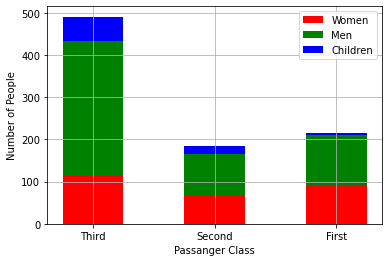

No. of Women ticket booked as per class: [114  66  91]
No. of Men ticket booked as per class: [319  99 119]
No. of ticket booked for children as per class: [58 19  6]


In [6]:
from matplotlib import pyplot as plt;
x=["Third","Second","First"]
xlabels=[x for x,_ in enumerate(x)];
Women=[];Men=[];Children=[];pclass=[3,2,1]
for i in pclass:
    Women.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"]==i)=="woman").dropna().count())
    Men.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"]==i)=="man").dropna().count())
    Children.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"]==i)=="child").dropna().count())
Women=np.array(Women);Men=np.array(Men);Children=np.array(Children)
plt.bar(xlabels,Women,color='red',width=0.5)
plt.bar(xlabels,Men,color='green',bottom=Women,width=0.5)
plt.bar(xlabels,Children,color='blue',bottom=(Men+Women),width=0.5)
plt.xticks(xlabels,x);
plt.grid()
plt.legend(["Women","Men","Children"])
plt.xlabel("Passanger Class")
plt.ylabel("Number of People")
plt.show()
print("No. of Women ticket booked as per class:",Women)
print("No. of Men ticket booked as per class:",Men)
print("No. of ticket booked for children as per class:",Children)

# Q.1.c.> Plot  the number of men,women and children and they are traveling in which class and same curve wuth people who survived. And show the survival ratio.

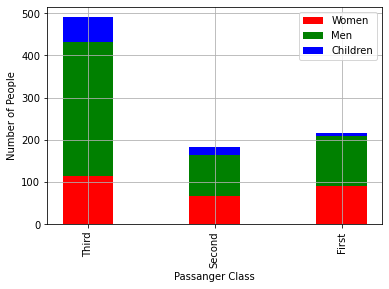

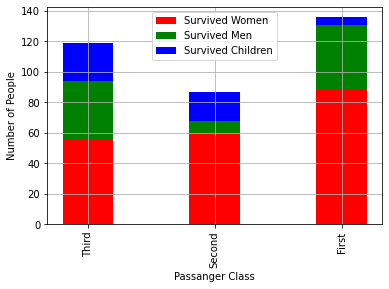

Women Survival Percentage in each class: [49.12280702 90.90909091 97.8021978 ] 
Men Survival Percentage in each class: [11.91222571  8.08080808 35.29411765] 
Children Survival Percentage in each class: [ 43.10344828 100.          83.33333333]


In [7]:
import numpy as np;
from matplotlib import pyplot as plt;
x=["Third","Second","First"]
xlabels=[x for x,_ in enumerate(x)];
Women_S=[];Men_S=[];Children_S=[];pclass=[3,2,1]
Women=[];Men=[];Children=[];
for i in pclass:
    Women.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"]==i)=="woman").dropna().count())
    Men.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"]==i)=="man").dropna().count())
    Children.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"]==i)=="child").dropna().count())
    Women_S.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"].where(g.titan["survived"]==1)==i)=="woman").dropna().count())
    Men_S.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"].where(g.titan["survived"]==1)==i)=="man").dropna().count())
    Children_S.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"].where(g.titan["survived"]==1)==i)=="child").dropna().count())
Women_S=np.array(Women_S);Men_S=np.array(Men_S);Children_S=np.array(Children_S);Women=np.array(Women);Men=np.array(Men);Children=np.array(Children);
plt.bar(xlabels,Women,color='red',width=0.4)
plt.bar(xlabels,Men,color='green',bottom=Women,width=0.4)
plt.bar(xlabels,Children,color='blue',bottom=(Men+Women),width=0.4)
plt.xticks(xlabels,x,rotation=90);
plt.xlabel("Passanger Class")
plt.ylabel("Number of People")
plt.grid();plt.legend(["Women","Men","Children"]);plt.show();
plt.bar(xlabels,Women_S,color='red',width=0.4)
plt.bar(xlabels,Men_S,color='green',bottom=Women_S,width=0.4)
plt.bar(xlabels,Children_S,color='blue',bottom=(Men_S+Women_S),width=0.4)
plt.xticks(xlabels,x,rotation=90);
plt.grid()
plt.legend(["Survived Women","Survived Men","Survived Children"])
plt.xlabel("Passanger Class")
plt.ylabel("Number of People")
plt.show()
print( "Women Survival Percentage in each class:",Women_S/Women*100,"\nMen Survival Percentage in each class:",Men_S/Men*100,"\nChildren Survival Percentage in each class:",Children_S/Children*100)

# Q.1.d>Plot  the number of men,women and children who survived they are traveling in which class.

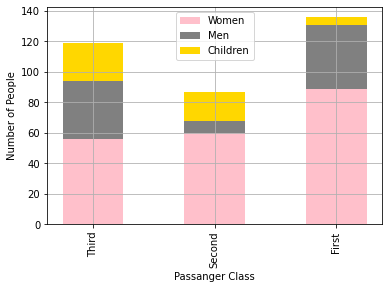

Women Survived: [56 60 89] 
Men Survived: [38  8 42] 
Children Survived: [25 19  5]


In [8]:
import numpy as np;
from matplotlib import pyplot as plt;
x=["Third","Second","First"]
xlabels=[x for x,_ in enumerate(x)];
Women_S=[];Men_S=[];Children_S=[];pclass=[3,2,1]
for i in pclass:
    Women_S.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"].where(g.titan["survived"]==1)==i)=="woman").dropna().count())
    Men_S.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"].where(g.titan["survived"]==1)==i)=="man").dropna().count())
    Children_S.append(g.titan["who"].where(g.titan["who"].where(g.titan["pclass"].where(g.titan["survived"]==1)==i)=="child").dropna().count())
Women_S=np.array(Women_S);Men_S=np.array(Men_S);Children_S=np.array(Children_S)
plt.bar(xlabels,Women_S,color='pink',width=0.5)
plt.bar(xlabels,Men_S,color='grey',bottom=Women_S,width=0.5)
plt.bar(xlabels,Children_S,color='gold',bottom=(Men_S+Women_S),width=0.5)
plt.xticks(xlabels,x,rotation=90);
plt.grid()
plt.title("")
plt.legend(["Women","Men","Children","Survived Women","Survived Men","Survived Children"])
plt.xlabel("Passanger Class")
plt.ylabel("Number of People")
plt.show()
print("Women Survived:",Women_S,"\nMen Survived:", Men_S,"\nChildren Survived:",Children_S)

# Q.2.a> Plot the number of people v/s fare(in pounds) 

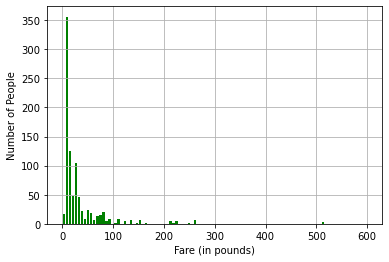

In [9]:
import numpy as np;
from matplotlib import pyplot as plt;
range1=(0,600)
bins=100
y=np.array(g.titan["fare"])
plt.hist(y, bins, range1, color = 'green',histtype = 'bar', rwidth = 0.8)
plt.xlabel('Fare (in pounds)')
plt.ylabel('Number of People')
plt.grid();plt.show();

# Q.2.b>Plot Fare v/s Person curve to understand affordibility of people.

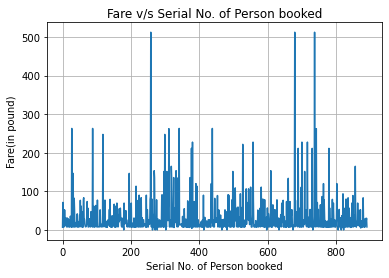

In [10]:
import numpy as np;
from matplotlib import pyplot as plt;
N=np.array(g.titan["fare"])
plt.plot(N)
plt.title("Fare v/s Serial No. of Person booked")
plt.xlabel("Serial No. of Person booked")
plt.ylabel("Fare(in pound)")
plt.grid();
plt.show();

# Outliers of Fare and imputation.

C:\Users\rugyr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

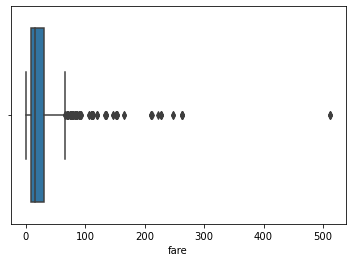

In [11]:
sns.boxplot(g.titan["fare"])

<ipython-input-13-633a3a8da6ba>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g.titan["fare"][i]=upper_limit;
C:\Users\rugyr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

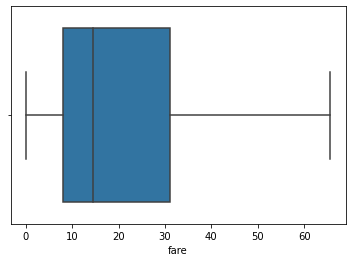

In [13]:
Q1=g.titan["fare"].quantile(0.25)
Q3=g.titan["fare"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
for i in range(len(g.titan)):
    if g.titan["fare"][i]<=lower_limit:
        g.titan["fare"][i]=lower_limit;
    elif g.titan["fare"][i]>=upper_limit:
        g.titan["fare"][i]=upper_limit;
sns.boxplot(g.titan["fare"])

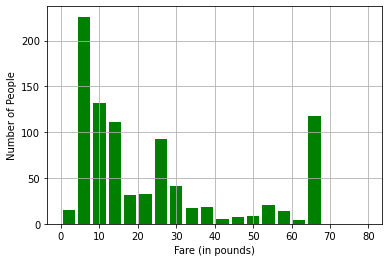

In [36]:
import numpy as np;
from matplotlib import pyplot as plt;
range1=(0,80)
bins=20
y=np.array(g.titan["fare"])
plt.hist(y, bins, range1, color = 'green',histtype = 'bar', rwidth = 0.8)
plt.xlabel('Fare (in pounds)')
plt.ylabel('Number of People')
plt.grid();plt.show();

# Q.4.a>The people survival mapping on the basis of boarding with siblings.

In [70]:
print("The percentage of survived with respect to SibSp:");
ns=[];nt=[];psr=[];loop=g.titan["sibsp"].unique();loop.sort();
for i in loop:
    ls=int(g.titan["sibsp"].where(g.titan["sibsp"].where(g.titan["survived"]==1)==i).dropna().count())
    lt=int(g.titan["sibsp"].where(g.titan["sibsp"]==i).dropna().count())
    ns.append(ls);
    nt.append(lt);
    psr.append(100*ls/lt)
print(psr,"\n",nt,"\n",ns)
mydict={"sibsp":loop,"Total Number of People":nt,"Number of People survived":ns,"Percentage Survival Rate":psr}
pd.DataFrame(mydict)

The percentage of survived with respect to SibSp:
[34.53947368421053, 53.588516746411486, 46.42857142857143, 25.0, 16.666666666666668, 0.0, 0.0] 
 [608, 209, 28, 16, 18, 5, 7] 
 [210, 112, 13, 4, 3, 0, 0]


,sibsp,Total Number of People,Number of People survived,Percentage Survival Rate
0,0,608,210,34.539474
1,1,209,112,53.588517
2,2,28,13,46.428571
3,3,16,4,25.000000
4,4,18,3,16.666667
5,5,5,0,0.000000
6,8,7,0,0.000000


# Q.4.b>The people survival mapping on the basis of boarding with siblings.